## SNetF mreža-analiza ##

In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import numpy as np
import pickle

In [2]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [3]:
input_path = "models/undirected_count_aggregationSNetF.gml" 

GSNet = nx.Graph(nx.read_gml(input_path)) 

In [ ]:
GSNet.nodes()

In [8]:
print(len(GSNet))

4174


In [ ]:
print(GSNet.edges['geek','reddit.com'])

In [ ]:
print(len(GSNet.edges()))

## Gustina mreže ##

In [12]:
print(nx.density(GSNet))

0.00036421878801720187


## Povezane komponente grafa SNet ##

In [13]:
print(nx.is_connected(GSNet))

False


In [14]:
component_size_list=[len(c) for c in sorted(nx.connected_components(GSNet), key=len, reverse=True)]
print(f'Broj povezanih komponenti:'+str(len(component_size_list)))
print(f'Lista povezanih komponenti:')
print(component_size_list)

Broj povezanih komponenti:4022
Lista povezanih komponenti:
[153, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Dominantna komponenta ##

In [15]:
dominant_cc=max(nx.connected_components(GSNet), key=len)
Gdom=GSNet.subgraph(dominant_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} cvorova i {len(Gdom.edges())} grana")
dom_path="models/dominantna_komponentaF.gml"
nx.write_gml(Gdom, dom_path)

Dominantna komponenta ima 153 cvorova i 3172 grana


## Dijametar mreže ##

In [16]:
print(nx.diameter(Gdom))

3


## Prosečna distanca 

In [17]:
print(nx.average_shortest_path_length(Gdom))

1.7330581355349157


## Koeficijent klasterisanja ##

In [4]:
subredit, clustering_coef=zip(*nx.clustering(GSNet, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit, clustering_coef) if cc>0]

dataFrameClu=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu.sort_values('clustering coeficient', inplace=True)

In [5]:
prosecni_stepen_klasterisanja=nx.average_clustering(GSNet)
print(f'Prosečan stepen klasterisanja:{prosecni_stepen_klasterisanja}')
print('Lokalni stepeni klasterisanja:')
print(dataFrameClu)

Prosečan stepen klasterisanja:0.029448255848653317
Lokalni stepeni klasterisanja:
    subreddit  clustering coeficient
1         Art               0.013954
95   religion               0.014215
130     books               0.014286
21      video               0.014763
14       food               0.014765
..        ...                    ...
51     Israel               0.023613
84     travel               0.023920
135      joel               0.024767
34       ruby               0.026779
33     gossip               0.028614

[138 rows x 2 columns]


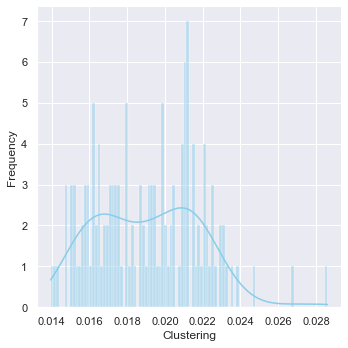

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
ax=sns.displot(dataFrameClu['clustering coeficient'],
              bins=100,
              kde=True,
              color='skyblue')
ax.set(xlabel='Clustering', ylabel='Frequency')

In [20]:
print(f'Maksimalni stepen klasterisanja:')
print(dataFrameClu.sort_values('clustering coeficient', ascending=False).head(1))

Maksimalni stepen klasterisanja:
   subreddit  clustering coeficient
33    gossip               0.028614


In [21]:
print(f'Globalni koeficijent klasterisanja:')
gcc=nx.transitivity(GSNet)
print(gcc)

Globalni koeficijent klasterisanja:
0.6363647934831032


### Upoređivanje sa ER mrežom ###

In [27]:
n=Gdom.number_of_nodes()
m=Gdom.number_of_edges()

In [28]:
p=(2*float(m))/(n*(n-1))  #p=2*m/(n*(n-1)), p je verovatnoca formiranja grane takva da je ocekivani broj grana m
print(p)
er=nx.erdos_renyi_graph(n,p)
delta_m=m-er.number_of_edges()
print(f"Broj grana originalne mreže minus broj grana u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

0.27278981768145855
Broj grana originalne mreže minus broj grana u ER mreži iznosi 27, što je odstupanje od 0.8511979823455234%


In [29]:
subredit1, clustering_coef1=zip(*nx.clustering(er, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit1, clustering_coef1) if cc>0]

dataFrameClu1=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu1.sort_values('clustering coeficient', inplace=True)
prosecni_stepen_klasterisanja1=nx.average_clustering(er)
print(f'Prosečan stepen klasterisanja ER mreže:{prosecni_stepen_klasterisanja1}')
print('Lokalni stepeni klasterisanja ER mreže:')
print(dataFrameClu1)
print(f'Maksimalni stepen klasterisanja ER mreže:')
print(dataFrameClu1.sort_values('clustering coeficient', ascending=False).head(1))
print(f'Globalni koeficijent klasterisanja ER mreže:')
er_gcc=nx.transitivity(er)
print(er_gcc)

Prosečan stepen klasterisanja ER mreže:0.2710717050018568
Lokalni stepeni klasterisanja ER mreže:
     subreddit  clustering coeficient
54          54               0.231061
138        138               0.232804
152        152               0.238475
141        141               0.242424
45          45               0.242857
..         ...                    ...
15          15               0.297683
27          27               0.298387
78          78               0.303571
104        104               0.308974
93          93               0.320635

[153 rows x 2 columns]
Maksimalni stepen klasterisanja ER mreže:
    subreddit  clustering coeficient
93         93               0.320635
Globalni koeficijent klasterisanja ER mreže:
0.2716987294132284


In [30]:
tabela=pd.DataFrame([(prosecni_stepen_klasterisanja, prosecni_stepen_klasterisanja1,
                     max(clustering_coef),
                     max(clustering_coef1), gcc, er_gcc)],
                    columns=['ACC','ACC-ER','LCC','LCC-ER','GCC','GCC-ER'])
print(tabela)

        ACC    ACC-ER       LCC    LCC-ER       GCC    GCC-ER
0  0.029448  0.271072  0.028614  0.320635  0.636365  0.271699


In [31]:
print(nx.diameter(er)) 

2


In [32]:
print(nx.average_shortest_path_length(er))

1.7295321637426901


## Fenomen malog sveta

In [33]:
import numpy as np

Za fenomen malog sveta realne mreže, potrebno je da budu zadovoljeni uslovi:
1. mala prosečna distanca dva čvora u mreži u odnosu na veličinu mreže: lnetwork~ln(n)/ln(d)
2. visoki globalni koeficijent klasterisanja u odnosu na globalni koeficijent klasterisanja kod ER mreže: Cn>>Cer

In [34]:
lnN=np.log(len(GSNet.nodes()))
print(lnN)
d=len(GSNet.edges())/len(GSNet.nodes())
lnd=np.log(d)
print(lnd)
print(lnN/lnd) 

8.336630087637147
-0.2745125048824074
-30.368853656441985


Nije ostvaren fenomen malog sveta.

## Asortativnost

In [35]:
r1=nx.degree_assortativity_coefficient(GSNet)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}") #radi

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: -0.5885601896834041


Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

In [ ]:
r2=nx.degree_assortativity_coefficient(GSNet, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}") #zasto prijavljuje gresku

Izvršavanjem ovog koda treba da se prikaže 0.02546861035 (kod kolege)

Mreža je neutralno asortativna, ne zna se da li čvorovi imaju tendenciju da se vezuju sa čvorovima sličnog stepena.

## Fenomen kluba bogatih

In [ ]:
rich_club_coef=nx.rich_club_coefficient(GSNet)

Čvorovi nemaju tendenciju da se vezuju međusobno, pogotovo da ne mogu da se vezuju sa čvorovima većeg stepena, jer smo zaključili da je mreža disasortitvna.

## Power-law distribucija 

In [38]:
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees) #raspakovanje
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())     #x-stepen, y-broj cvorova koji imaju odredjeni stepen                                                 

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({0: 4021, 135: 2, 102: 2, 110: 2, 209: 2, 2015: 1, 15094: 1, 4623: 1, 1112: 1, 1593: 1, 36488: 1, 19827: 1, 8082: 1, 25844: 1, 894: 1, 9914: 1, 45869: 1, 4762: 1, 1029: 1, 19727: 1, 8191: 1, 218194: 1, 19486: 1, 87618: 1, 4058: 1, 167: 1, 517: 1, 13924: 1, 5327: 1, 10856: 1, 75611: 1, 3969: 1, 60034: 1, 84378: 1, 3304: 1, 1262: 1, 101: 1, 2147: 1, 5629: 1, 5282: 1, 1485: 1, 2665: 1, 129658: 1, 1531: 1, 26695: 1, 17751: 1, 6002: 1, 912: 1, 2568: 1, 82762: 1, 22858: 1, 5365: 1, 5641: 1, 331100: 1, 13209: 1, 22493: 1, 779: 1, 2274: 1, 342: 1, 1021: 1, 40051: 1, 245: 1, 22355: 1, 558: 1, 9960: 1, 212792: 1, 2105: 1, 26031: 1, 3487: 1, 33900: 1, 35480: 1, 224929: 1, 1247: 1, 1093: 1, 3410: 1, 7158: 1, 1728: 1, 7319: 1, 2919: 1, 1106: 1, 7205: 1, 2720: 1, 4132: 1, 93430: 1, 180517: 1, 216705: 1, 812: 1, 746: 1, 30476: 1, 23150: 1, 23525: 1, 1633: 1, 1185: 1, 3150: 1, 94152: 1, 28133: 1, 248260: 1, 2760: 1, 216: 1, 4366: 1, 103: 1, 538: 1, 1449: 1, 14057: 1, 18663: 1, 81362: 1, 40691:

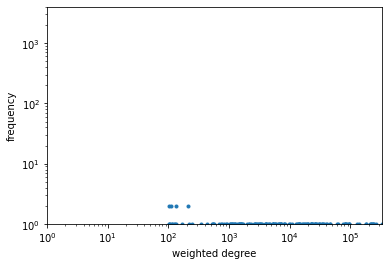

In [39]:
plot_deg_frequency(GSNet, True)

Navedena distribucija čvorova po težinskom stepenu ne prati power-law raspodelu.

## Habovi i autoriteti

In [7]:
#hubs_authorities=nx.hits(G) #SNet mreza je neusmerena, pa ne mogu se odrediti habovi i autoriteti

## Analiza mera centralnosti ##

1) Centralnosti po stepenu, bliskosti, relacionoj centralnosti 2) Centralnosti po sopstvenom vektoru

In [40]:
DC_dict=nx.degree_centrality(GSNet)

In [41]:
CC_dict=nx.closeness_centrality(GSNet)

In [42]:
BC_dict=nx.betweenness_centrality(GSNet)

In [43]:
EVC_dict = nx.eigenvector_centrality(GSNet)

In [ ]:
df1=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
df2=pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
df3=pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
df4=pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
df=pd.concat([df1, df2, df3, df4], axis=1)
print(df)

In [45]:
with open("data1/snetF-centralities", 'wb') as file:
    pickle.dump(df, file)

### Centralnost po stepenu ###

In [46]:
df_dc = pd.DataFrame({'DC':df['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10))

                     DC
reddit.com     0.035945
funny          0.031153
science        0.031153
politics       0.031153
pics           0.030913
technology     0.030673
worldnews      0.030434
WTF            0.029236
entertainment  0.028277
programming    0.028277


### Centralnost po bliskosti ###

In [47]:
df_cc = pd.DataFrame({'CC':df['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10))

                     CC
reddit.com     0.035952
funny          0.031819
science        0.031819
politics       0.031819
pics           0.031637
technology     0.031458
worldnews      0.031280
WTF            0.030421
entertainment  0.029766
programming    0.029766


### Relaciona centralnost ###

In [48]:
df_bc = pd.DataFrame({'BC':df['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10))

                     BC
reddit.com     0.000320
programming    0.000078
science        0.000064
funny          0.000062
politics       0.000060
pics           0.000054
technology     0.000052
worldnews      0.000051
WTF            0.000040
entertainment  0.000031


### Centralnost po sopstvenom vektoru ###

In [49]:
df_ec = pd.DataFrame({'EVC':df['EVC']})
df_ec.sort_values(by='EVC', ascending=False, inplace = True)
print(df_ec.head(10))

                    EVC
reddit.com     0.144243
politics       0.143114
funny          0.143085
pics           0.143083
science        0.143053
technology     0.142900
worldnews      0.142689
WTF            0.141505
entertainment  0.140742
programming    0.139148


In [50]:
with open("data1/snetF-centralities", 'rb') as file:
    df = pickle.load(file)

### Kacova centralnost ###

In [51]:
import pickle
with open("data1/katz_b=1000-SNetF", 'rb') as file:
    df_katz = pickle.load(file)

In [52]:
print(df_katz.sort_values(by='EVC', ascending=False).head(10))

                    EVC  EVC_rank
reddit.com     0.324493       1.0
politics       0.267666       2.0
pics           0.248381       3.0
funny          0.238874       4.0
science        0.233412       5.0
technology     0.226348       6.0
worldnews      0.220698       7.0
WTF            0.216698       8.0
entertainment  0.216095       9.0
programming    0.189027      10.0


## Korelacija metrika centralnosti ##

In [53]:
df_correlation=pd.merge(df, df_katz, left_index=True, right_index=True)
df_correlation.rename(columns = {'EVC_x':'EVC', 'EVC_y':'KatzC'}, inplace = True)
df_correlation=df_correlation.drop(['EVC_rank'], axis=1)
print(df_correlation)

                      DC   CC   BC           EVC     KatzC
askXKCD              0.0  0.0  0.0  2.815773e-18  0.007756
AmericanEconomy      0.0  0.0  0.0  2.815773e-18  0.007756
electronics          0.0  0.0  0.0  2.815773e-18  0.007756
Boxing               0.0  0.0  0.0  2.815773e-18  0.007756
nyc                  0.0  0.0  0.0  2.815773e-18  0.007756
...                  ...  ...  ...           ...       ...
emerfv               0.0  0.0  0.0  2.815773e-18  0.007756
freebies             0.0  0.0  0.0  2.815773e-18  0.007756
Zinemaya             0.0  0.0  0.0  2.815773e-18  0.007756
flash                0.0  0.0  0.0  2.815773e-18  0.007756
vitaminsforhairloss  0.0  0.0  0.0  2.815773e-18  0.007756

[4174 rows x 5 columns]


In [54]:
labele=['DC','CC','BC', 'EVC', 'KatzC']
matrica_korelacije=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])
p_val_matrica=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])

for i in labele:
    for j in labele:
        matrica_korelacije[i][j], p_val_matrica[i][j]=stats.kendalltau(df_correlation[i], df_correlation[j])
        
print(matrica_korelacije)
print(p_val_matrica) 

             DC        CC        BC       EVC     KatzC
DC          1.0   0.99988  0.629533  0.999887  0.999106
CC      0.99988       1.0  0.629518  0.999792  0.999059
BC     0.629533  0.629518       1.0  0.629372   0.62904
EVC    0.999887  0.999792  0.629372       1.0  0.999031
KatzC  0.999106  0.999059   0.62904  0.999031       1.0
        DC   CC   BC  EVC KatzC
DC     0.0  0.0  0.0  0.0   0.0
CC     0.0  0.0  0.0  0.0   0.0
BC     0.0  0.0  0.0  0.0   0.0
EVC    0.0  0.0  0.0  0.0   0.0
KatzC  0.0  0.0  0.0  0.0   0.0


## Kompozitna mera centralnosti ##

In [55]:
df_ = df_correlation
for metric in labele:
    df_[f"{metric}_rank"] = df_correlation[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']* df_['KatzC_rank'] #composite_rank=dc_rank*cc_rank*bc_rank*evc_rank*katz_rank

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                     DC        CC        BC       EVC     KatzC  DC_rank  \
reddit.com     0.035945  0.035952  0.000320  0.144243  0.324493      1.0   
politics       0.031153  0.031819  0.000060  0.143114  0.267666      3.0   
funny          0.031153  0.031819  0.000062  0.143085  0.238874      3.0   
science        0.031153  0.031819  0.000064  0.143053  0.233412      3.0   
pics           0.030913  0.031637  0.000054  0.143083  0.248381      5.0   
technology     0.030673  0.031458  0.000052  0.142900  0.226348      6.0   
programming    0.028277  0.029766  0.000078  0.139148  0.189027      9.5   
worldnews      0.030434  0.031280  0.000051  0.142689  0.220698      7.0   
WTF            0.029236  0.030421  0.000040  0.141505  0.216698      8.0   
entertainment  0.028277  0.029766  0.000031  0.140742  0.216095      9.5   

               CC_rank  BC_rank  EVC_rank  KatzC_rank  composite_rank  
reddit.com         1.0      1.0       1.0         1.0             1.0  
politics           

## Detekcija komuna ##

### Hijerarhijsko klasterisanje

In [7]:
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
comp=nx.community.girvan_newman(GSNet)
k=15
hierarchical_decomposition={}
i=2
for communities in itertools.islice(comp, k):
    hierarchical_decomposition[i]=tuple(sorted(c) for c in communities)
    i=i+1  #dugo traje

In [ ]:
def print_decomposition(hierarchy, num_clusters):
    decomposition_tupple = hierarchy[num_clusters]
    print(f"Dekompozicija na {num_clusters} komuna")
    for com_ind in range(num_clusters):
        print(f"Komuna {com_ind+1} ima {len(decomposition_tupple[com_ind])} clanova")
        print(decomposition_tupple[com_ind])
        print("-----------------------------------------------------------------------")

In [ ]:
print_decomposition(hierarchical_decomposition, 3)

In [3]:
def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [ ]:
plot_and_save_dendrogram(Gdom)

## Spektralno klasterisanje

In [96]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from docx import Document
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [97]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{title}F.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}F.svg")
    plt.show() 

In [98]:
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

In [99]:
def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

In [ ]:

# read the multigraph
#G = GSNet
# create weighted graph G2 from multigraph G
G2 = nx.Graph()
for u,v,data in GSNet.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G2.has_edge(u,v):
        G2[u][v]['weight'] += w
    else:
        G2.add_edge(u, v, weight=w)

zaposleni_multigraf = set(G2.nodes)

print("Izolovani cvorovi:")
for z in GSNet.nodes:
    if z not in zaposleni_multigraf:
        G2.add_node(z)
        print(z)


#print(G2.edges(data=True))

#nx.write_pajek(G2, "etf/agregirano_etf.net")
# [(1, 2, {'weight': 26}), (2, 3, {'weight': 42})]

C:\Users\Sandra\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1097: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


     k  lambda_k
0    1       0.0
1    2       0.0
2    3       0.0
3    4       0.0
4    5       0.0
5    6       0.0
6    7       0.0
7    8       0.0
8    9       0.0
9   10       0.0
10  11       0.0
11  12       0.0
12  13       0.0
13  14       0.0
14  15       0.0
15  16       0.0
16  17       0.0
17  18       0.0
18  19       0.0
19  20       0.0
20  21       0.0
21  22       0.0
22  23       0.0
23  24       0.0
24  25       0.0
25  26       0.0
26  27       0.0
27  28       0.0
28  29       0.0
29  30       0.0


C:\Users\Sandra\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


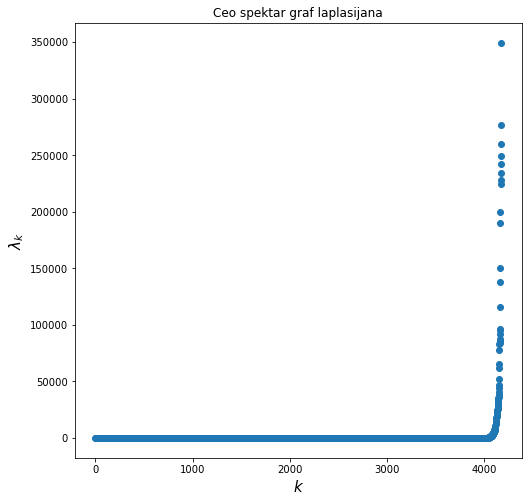

In [101]:

L = nx.laplacian_matrix(G2).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

#doc = Document()
doc = Document('etf/tabela_eig2.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])
doc.save('etf/tabela_eig2.docx')




plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

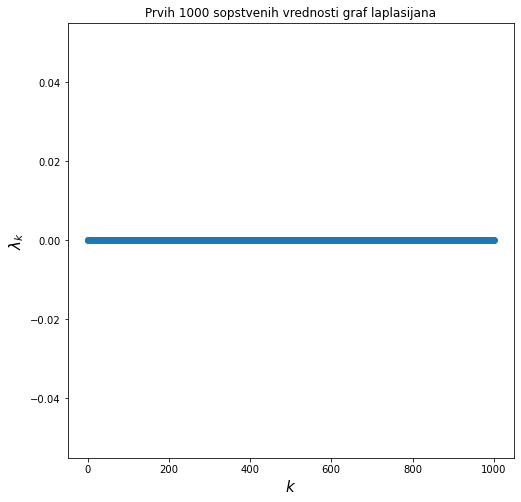

In [104]:
# prvih 30 sopstvenih vrednosti

df_eig_100 = df_eig[:1000]

plot_scatterplot(df_eig_100.iloc[:,0], df_eig_100.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 1000 sopstvenih vrednosti graf laplasijana')


In [ ]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')

In [105]:
def get_components2(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    #print("EVM:")
    #EV_mat = np.array(list(eigenspace0_basis)).T
    #print(pd.DataFrame(EV_mat))
    
    IV_rref, _ = sympy.Matrix(eigenspace0_basis).rref()
    print(IV_rref)
    
    
    # transformation into indicator vectors
    #indicator_vector_container = []
    #for eigenvector in eigenspace0_basis:
        
    #    max_component = max([abs(c) for c in eigenvector])
    #    indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
    #    indicator_vector_container.append(indicator_vector)
    
    #print("Indicator vector matrix:")
    IV_mat = np.array(IV_rref).T
    #print(pd.DataFrame(IV_mat))
        
    components = []
    IV_rref = np.array(IV_rref)
    for iv in IV_rref:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components

In [106]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

def get_components(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 


    print("EVM:")
    EV_mat = np.array(list(eigenspace0_basis)).T
    print(pd.DataFrame(EV_mat))
    
    # transformation into indicator vectors
    indicator_vector_container = []
    for eigenvector in eigenspace0_basis:
        
        max_component = max([abs(c) for c in eigenvector])
        indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
        indicator_vector_container.append(indicator_vector)
    
    print("Indicator vector matrix:")
    IV_mat = np.array(indicator_vector_container).T
    print(pd.DataFrame(IV_mat))
        
    components = []
    for iv in indicator_vector_container:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components


In [ ]:
#test
W = [[0,0,0,0,0,0], [0,0,1,0,0,0,], [0,1,0,0,0,0,], [0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
D = np.diag([0,1,1,2,2,2])
Test_L = D - np.array(W)
get_components3(Test_L,3)

In [107]:
# partition G2 to components
components = get_components3(L, 21)

#print(components)
component_sizes = [len(c) for c in components]
print(component_sizes)
print(sum(component_sizes))
zipped = list(zip(component_sizes, components)) # pair component sizes and components
zipped.sort(key=lambda tup: tup[0], reverse = True) # sort pairs by component size
component_sizes, components = zip(*zipped) 
#print(component_sizes)
#print(sum(component_sizes))

dominant_component_indexes = components[0]

dominant_component_labels = []
for i, label in enumerate(list(G2.nodes())):
    if i in dominant_component_indexes:
        dominant_component_labels.append(label)

#print(dominant_component_indexes)
#print(dominant_component_labels)

[4153, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4174


In [108]:
dominant_component = G2.subgraph(dominant_component_labels)
for k in range(2, 30):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    #nx.write_gml(G, f"etf/spectral/spectral{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes.astype(int)}")

C:\Users\Sandra\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Podela na 2: velicine komponenata su [2112 2041]
Podela na 3: velicine komponenata su [2045   71 2037]
Podela na 4: velicine komponenata su [2065 1999   20   69]
Podela na 5: velicine komponenata su [1965   61   44 2052   31]
Podela na 6: velicine komponenata su [2000   52   19   17   59 2006]
Podela na 7: velicine komponenata su [2002   30   23   53   16 2011   18]
Podela na 8: velicine komponenata su [1969   72   32 2042    0   13   16    9]
Podela na 9: velicine komponenata su [  48   41   13 2007    4 2018    7    0   15]
Podela na 10: velicine komponenata su [1980   38   16    9   35   17 2042    7    2    7]
Podela na 11: velicine komponenata su [2004   38    8   14    5   17 2015    9    0    6   37]
Podela na 12: velicine komponenata su [1992    9   40    7    6   11   36   13    5    5 2029    0]
Podela na 13: velicine komponenata su [2014   10    5   15   56 2012   15    8    7    0    0    0   11]
Podela na 14: velicine komponenata su [2036   40    5   12    6   22   15   11

## Louvain metod

Ako je postavljena rezolucija 0.9

In [57]:
df_mod1 = pd.read_csv("data1/modularnost0.9-SNetF.csv")
print(df_mod1)

        Id                Label  timeset  modularity_class
0        0              askXKCD      NaN                 0
1        1      AmericanEconomy      NaN                 1
2        2          electronics      NaN                 2
3        3               Boxing      NaN                 3
4        4                  nyc      NaN                 4
...    ...                  ...      ...               ...
4169  4169               emerfv      NaN              4019
4170  4170             freebies      NaN              4020
4171  4171             Zinemaya      NaN              4021
4172  4172                flash      NaN              4022
4173  4173  vitaminsforhairloss      NaN              4023

[4174 rows x 4 columns]


In [58]:
df_grupisi_mod=df_mod1.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
1278                         83
2666                         51
3287                         19
0                             1
2675                          1
2676                          1
2677                          1
2678                          1
2679                          1
2680                          1


In [59]:
print(df_mod1[df_mod1['modularity_class']==1278].head(20))

      Id                Label  timeset  modularity_class
59    59             Military      NaN              1278
192  192                  ads      NaN              1278
207  207                  DIY      NaN              1278
274  274             collapse      NaN              1278
334  334               Python      NaN              1278
341  341                   ru      NaN              1278
408  408         productivity      NaN              1278
425  425               iphone      NaN              1278
454  454               google      NaN              1278
600  600           newreddits      NaN              1278
601  601            worldnews      NaN              1278
630  630            bicycling      NaN              1278
686  686                   de      NaN              1278
713  713              haskell      NaN              1278
830  830            australia      NaN              1278
842  842            feminisms      NaN              1278
894  894               nature  

In [60]:
print(df_mod1[df_mod1['modularity_class']==2666].head(20))

        Id          Label  timeset  modularity_class
98      98            Art      NaN              2666
327    327         Health      NaN              2666
333    333          space      NaN              2666
397    397          Bacon      NaN              2666
433    433     conspiracy      NaN              2666
435    435         bestof      NaN              2666
572    572           food      NaN              2666
583    583          Drugs      NaN              2666
616    616     web_design      NaN              2666
739    739          video      NaN              2666
801    801         Frugal      NaN              2666
812    812           geek      NaN              2666
840    840         videos      NaN              2666
1101  1101    Libertarian      NaN              2666
1114  1114        history      NaN              2666
1209  1209    environment      NaN              2666
1233  1233  worldpolitics      NaN              2666
1383  1383            aww      NaN            

Ako je postavljena rezolucija 1.0

In [61]:
df_mod1_2 = pd.read_csv("data1/modularnost1-SNetF.csv")
print(df_mod1_2)

        Id                Label  timeset  modularity_class
0        0              askXKCD      NaN                 0
1        1      AmericanEconomy      NaN                 1
2        2          electronics      NaN                 2
3        3               Boxing      NaN                 3
4        4                  nyc      NaN                 4
...    ...                  ...      ...               ...
4169  4169               emerfv      NaN              4018
4170  4170             freebies      NaN              4019
4171  4171             Zinemaya      NaN              4020
4172  4172                flash      NaN              4021
4173  4173  vitaminsforhairloss      NaN              4022

[4174 rows x 4 columns]


In [62]:
df_grupisi_mod=df_mod1_2.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
3286                         87
1278                         66
0                             1
2672                          1
2674                          1
2675                          1
2676                          1
2677                          1
2678                          1
2679                          1


In [63]:
print(df_mod1_2[df_mod1_2['modularity_class']==3286].head(20))

      Id         Label  timeset  modularity_class
59    59      Military      NaN              3286
192  192           ads      NaN              3286
207  207           DIY      NaN              3286
274  274      collapse      NaN              3286
334  334        Python      NaN              3286
341  341            ru      NaN              3286
408  408  productivity      NaN              3286
425  425        iphone      NaN              3286
436  436        Design      NaN              3286
454  454        google      NaN              3286
600  600    newreddits      NaN              3286
601  601     worldnews      NaN              3286
630  630     bicycling      NaN              3286
686  686            de      NaN              3286
713  713       haskell      NaN              3286
830  830     australia      NaN              3286
842  842     feminisms      NaN              3286
894  894        nature      NaN              3286
898  898            fr      NaN              3286


In [64]:
print(df_mod1_2[df_mod1_2['modularity_class']==1278].head(20))

        Id        Label  timeset  modularity_class
98      98          Art      NaN              1278
327    327       Health      NaN              1278
333    333        space      NaN              1278
397    397        Bacon      NaN              1278
433    433   conspiracy      NaN              1278
435    435       bestof      NaN              1278
572    572         food      NaN              1278
583    583        Drugs      NaN              1278
616    616   web_design      NaN              1278
620    620    Economics      NaN              1278
739    739        video      NaN              1278
778    778   MensRights      NaN              1278
801    801       Frugal      NaN              1278
812    812         geek      NaN              1278
835    835        obama      NaN              1278
840    840       videos      NaN              1278
960    960   government      NaN              1278
1101  1101  Libertarian      NaN              1278
1114  1114      history      Na

Ako je rezolucija 2

In [65]:
df_mod5 = pd.read_csv("data1/modularnost2-SNetF.csv")
df_grupisi_mod=df_mod5.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
1278                        153
0                             1
2672                          1
2674                          1
2675                          1
2676                          1
2677                          1
2678                          1
2679                          1
2680                          1


In [66]:
print(df_mod5[df_mod5['modularity_class']==1278].head(20))

      Id         Label  timeset  modularity_class
59    59      Military      NaN              1278
98    98           Art      NaN              1278
192  192           ads      NaN              1278
207  207           DIY      NaN              1278
274  274      collapse      NaN              1278
327  327        Health      NaN              1278
333  333         space      NaN              1278
334  334        Python      NaN              1278
341  341            ru      NaN              1278
397  397         Bacon      NaN              1278
408  408  productivity      NaN              1278
425  425        iphone      NaN              1278
433  433    conspiracy      NaN              1278
435  435        bestof      NaN              1278
436  436        Design      NaN              1278
454  454        google      NaN              1278
572  572          food      NaN              1278
583  583         Drugs      NaN              1278
600  600    newreddits      NaN              1278


In [67]:
print(df_mod5[df_mod5['modularity_class']==0].head(20))

   Id    Label  timeset  modularity_class
0   0  askXKCD      NaN                 0


## Mostovi

In [68]:
mostovi=nx.bridges(GSNet)
mostovi=list(mostovi)
print(mostovi)

[('ru', 'reddit.com'), ('iphone', 'reddit.com'), ('newreddits', 'reddit.com'), ('de', 'reddit.com'), ('fr', 'reddit.com'), ('reddit.com', 'blogs'), ('reddit.com', 'it'), ('reddit.com', 'egalitarian'), ('reddit.com', 'zh'), ('reddit.com', 'ideas'), ('reddit.com', 'Astronomy'), ('reddit.com', 'education'), ('reddit.com', 'area51'), ('programming', 'lisp'), ('programming', 'cpp')]


In [ ]:
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (8,8)
img = mpimg.imread('mostoviSNetF.png')
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread('mostoviSNetF1.png')
imgplot = plt.imshow(img)
plt.show()